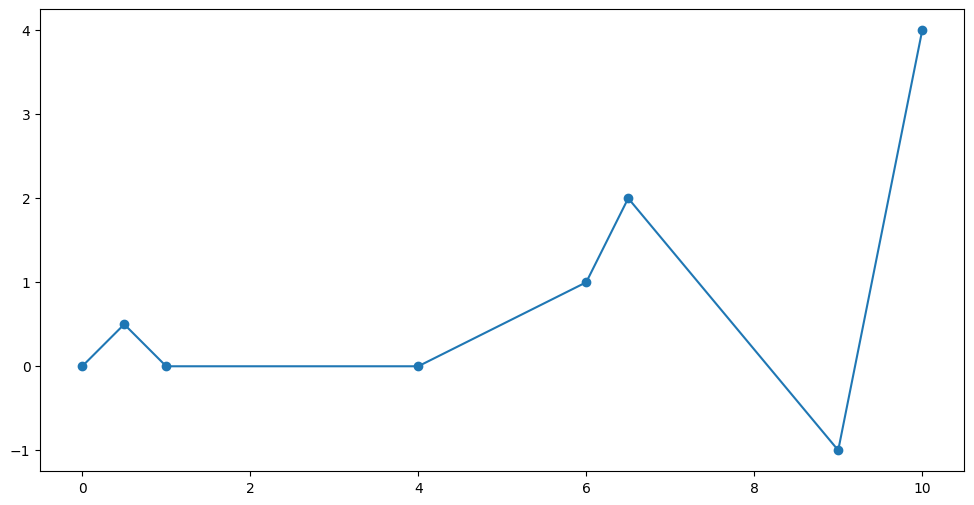

In [1]:
import matplotlib.pyplot as plt

import numpy as np
poly = np.array([[0,0],
                 [0.5,0.5],
                 [1,0],
                 [4,0],
                 [6,1],
                 [6.5,2],
                 [9,-1],
                 [10,4]
                ]);

fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

In [2]:
import math 
def point_point_distance(x1,y1,x2,y2):
    dx = x2-x1
    dy = y2-y1
    return math.sqrt(dx*dx+dy*dy)

print(point_point_distance(0,0,3,4))
print(point_point_distance(-3,0,0,4))
print(point_point_distance(-3,0,0,-4))

5.0
5.0
5.0


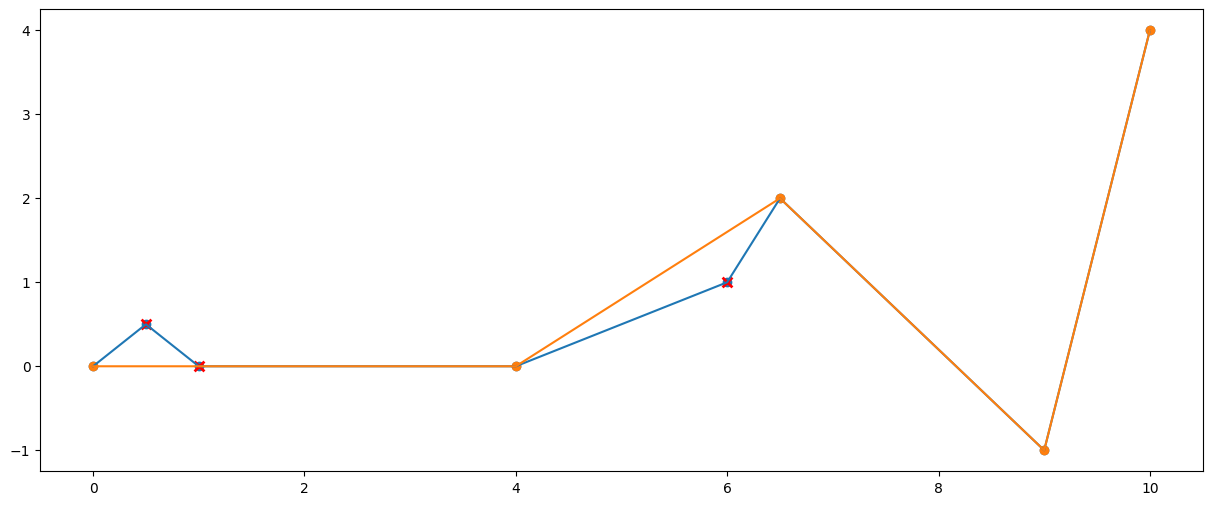

In [3]:
def simplify_radial_distance(tolerance,p,step=-1):
    mask = np.ones(len(p),dtype='bool')
    marker = np.array([])
    if step == -1:
        maxstep = len(p)
    else:
        maxstep = min(step,len(p))
    
    for i in range(0,maxstep):
        marker = np.array([i])
        if not mask[i]:
            continue
        for j in range(i+1,len(p)):
            distance = point_point_distance(p[i,0],p[i,1],p[j,0],p[j,1])
            if distance > tolerance:
                break
            else:
                mask[j] = False
    mask[-1] = True
    return mask,marker


mask,_ = simplify_radial_distance(2.5,poly)

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')
plt.clf()
#the original polygon
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

#simplified polygon
simplified = poly[mask]
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])

#deleted points
deleted = poly[np.logical_not(mask)]
plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)


In [ ]:
def plotpoly(tolerance,step):
    mask,marker = simplify_radial_distance(tolerance,poly,step)

    #figure
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #the original polygon
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])

    #simplified polygon
    simplified = poly[mask]
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)

    if len(marker):
        c = plt.Circle(poly[marker[0]],tolerance,linestyle='--',color='red',linewidth=2.0,fill=False)
        fig.gca().add_artist(c)

import ipywidgets as widgets
from ipywidgets import interact
interact(plotpoly, tolerance=(0,5,0.1),step=(0,10,1));

interactive(children=(FloatSlider(value=2.0, description='tolerance', max=5.0), IntSlider(value=5, description…